The activation function, denoted here by f, is typically a nonlinear function. A linear function is one whose graph is a straight line. In this example, wx+b is a linear function. So, essentially, a perceptron is a composition of a linear and a nonlinear function. The linear expression wx+b is also known as an affine transform.

In [1]:
import torch
import torch.nn as nn
from Demos.win32cred_demo import target

In [2]:
class Perceptron(nn.Module):

    def __init__(self,input_dim):

        super(Perceptron,self).__init__()
        self.fc1=nn.Linear(input_dim,1)

        def forward(self,x_in):
            return torch.sigmoid(self.fc1(x_in)).squeeze()

C:\Users\thami\AppData\Local\Temp\ipykernel_2912\54820201.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-5.,5.,0.1)


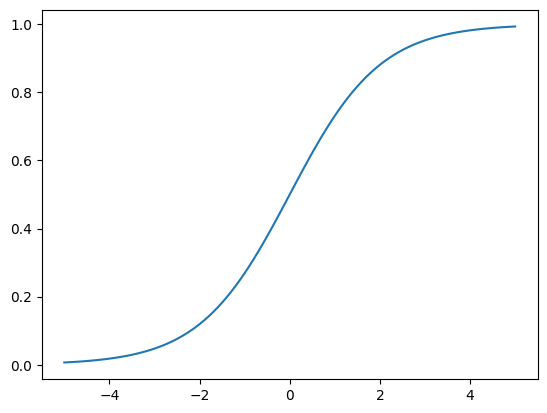

In [3]:
import matplotlib.pyplot as plt

x=torch.range(-5.,5.,0.1)
y=torch.sigmoid(x)

plt.plot(x.numpy(),y.numpy())
plt.show()

C:\Users\thami\AppData\Local\Temp\ipykernel_2912\3255850986.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-5.,5.,0.1)


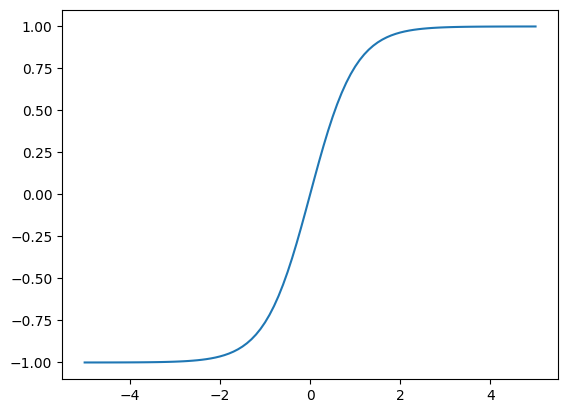

In [4]:
x=torch.range(-5.,5.,0.1)
y=torch.tanh(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

C:\Users\thami\AppData\Local\Temp\ipykernel_2912\4198016890.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-5.,5.,0.1)


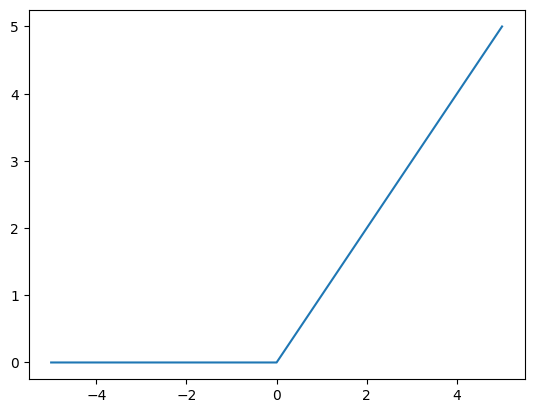

In [5]:
relu=torch.nn.ReLU()
x=torch.range(-5.,5.,0.1)
y=relu(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

C:\Users\thami\AppData\Local\Temp\ipykernel_2912\3917225250.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-5.,5.,0.1)


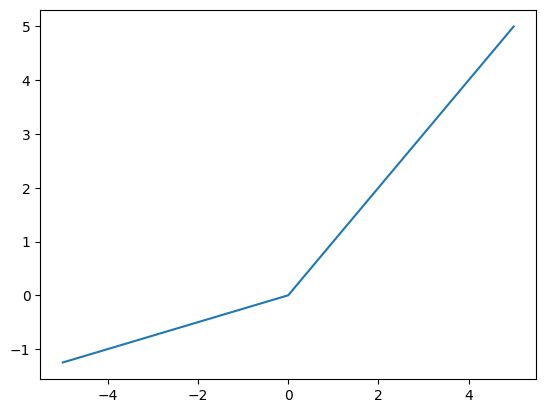

In [11]:
prelu=torch.nn.PReLU(num_parameters=1)
x=torch.range(-5.,5.,0.1)
y=prelu(x)
plt.plot(x.numpy(),y.detach().numpy())
plt.show()

In [12]:
softmax=torch.nn.Softmax(dim=1)
x_input=torch.randn(1,3)
y_output=softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output,dim=1))

tensor([[-1.8289, -1.8569, -0.4345]])
tensor([[0.1665, 0.1619, 0.6715]])
tensor([1.])


In [14]:
mse_loss=torch.nn.MSELoss()
outputs=torch.randn(3,5,requires_grad=True)
targets=torch.randn(3,5)
loss=mse_loss(outputs,targets)
print(loss)

tensor(1.9956, grad_fn=<MseLossBackward0>)


In [15]:
ce_loss=torch.nn.CrossEntropyLoss()
outputs=torch.randn(3,5,requires_grad=True)
targets=torch.tensor([1,0,3],dtype=torch.int64)
loss=ce_loss(outputs,targets)
print(loss)

tensor(2.3176, grad_fn=<NllLossBackward0>)


In [18]:
bce_loss=nn.BCELoss()
sigmoid=torch.nn.Sigmoid()
probabilities=sigmoid(torch.randn(4,1,requires_grad=True))
targets=torch.tensor([1,0,1,0],dtype=torch.float32).view(4,1)
loss=bce_loss(probabilities,targets)
print(probabilities)
print(loss)

tensor([[0.3650],
        [0.6569],
        [0.7070],
        [0.7424]], grad_fn=<SigmoidBackward0>)
tensor(0.9452, grad_fn=<BinaryCrossEntropyBackward0>)


In [19]:
import torch.optim as optim

input_dim=2
lr=0.001

perceptron=Perceptron(input_dim=input_dim)
bce_loss=nn.BCELoss()
optimizer=optim.Adam(params=perceptron.parameters(),lr=lr)